# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading data

In [8]:
df=pd.read_csv('/content/drive/My Drive/Intern/bank-full.csv')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
dataset=df

In [12]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
X=dataset.drop(columns='Target')
Y=dataset['Target']

In [15]:
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [17]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [18]:
X.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Observation:
- There are no null values present in the dataset

In [19]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
X.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

# Deliverable -1 (Exploratory Data Analysis):

## Univariate analysis

### Plotting Age

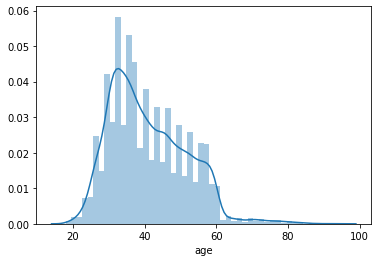

In [21]:
sns.distplot(X.age)

### Plotting duration

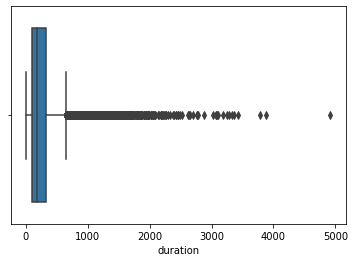

In [22]:
sns.boxplot(X.duration)

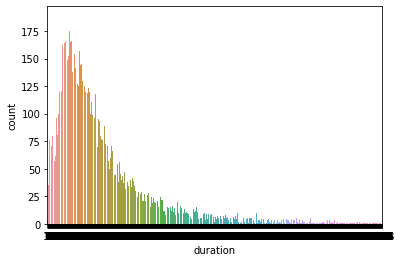

In [23]:
sns.countplot(X.duration)

### Plotting Balance

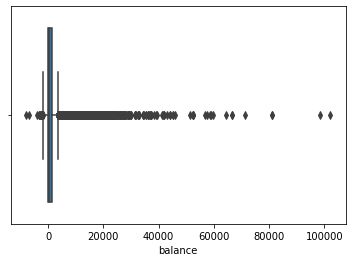

In [24]:
sns.boxplot(X.balance)

### Plotting Day

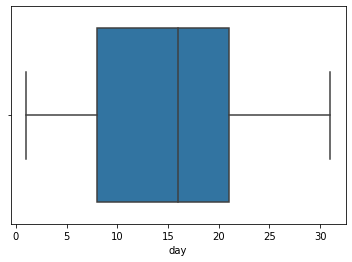

In [25]:
sns.boxplot(X.day)

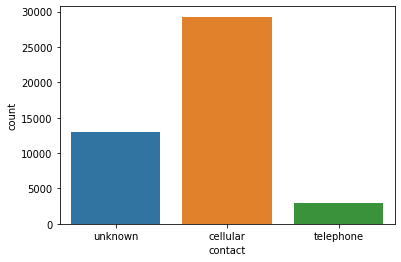

In [26]:
sns.countplot(X.contact)

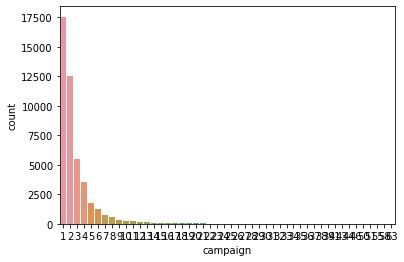

In [27]:
sns.countplot(X.campaign)

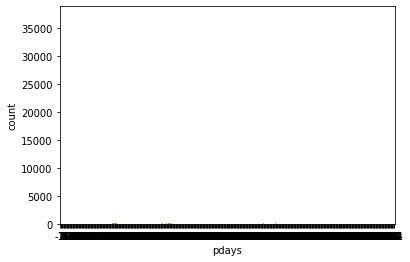

In [28]:
sns.countplot(X.pdays)

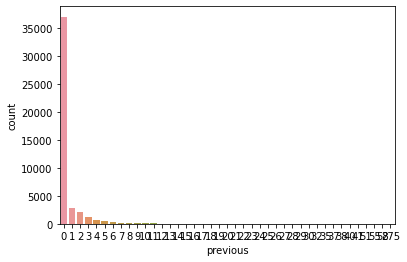

In [29]:
sns.countplot(X.previous)

# Bivariate analysis 

In [30]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


### Plotting graph b/w age and job

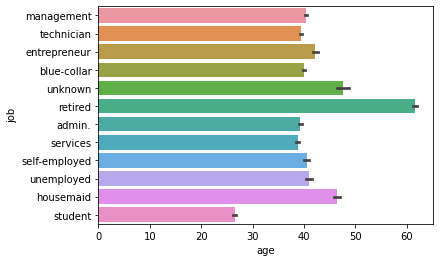

In [31]:
sns.barplot(x=X.age,y=X.job)

### Plotting graph b/w Age and Marital

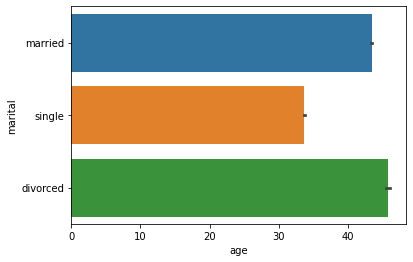

In [32]:
sns.barplot(x=X.age,y=X.marital)

### Plotting Grpah b/w Age and Education

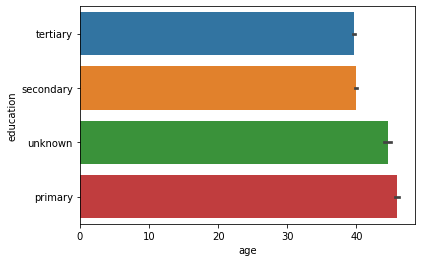

In [33]:
sns.barplot(x=X.age,y=X.education)

### Plotting graph b/w Age and Poutcome

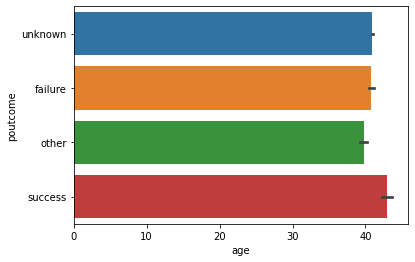

In [34]:
sns.barplot(x=X.age,y=X.poutcome)

### Drawing Heatmap for the existing data

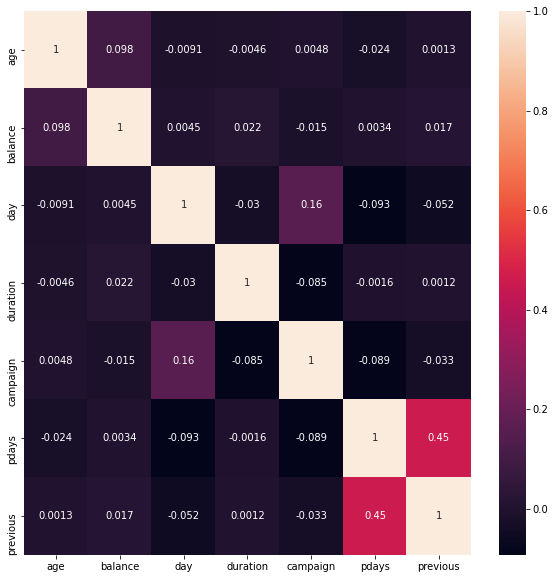

In [35]:
plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

# Deliverable - 2 (Prepare the data for analytics)

In [36]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [37]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

# Observations

We found categorical columns - ['job','marital','education','default','housing','loan','contact','month','poutcome']

In [38]:
Cat_col= ['job','marital','education','default','housing','loan','contact','month','poutcome']

# Converting categorical columns to Numerical

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
for i in Cat_col:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])

In [41]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [42]:
X.drop('duration', inplace = True, axis=1)

In [43]:
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object

In [44]:
Y=le.fit_transform(Y)

In [45]:
Y

array([0, 0, 0, ..., 1, 0, 0])

### Create the training set and test set in ratio of 70:30

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_Test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=1)

In [48]:
X_train.shape,X_Test.shape,Y_train.shape,Y_test.shape

((31647, 15), (13564, 15), (31647,), (13564,))

###  Normalizing the data

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_Test)

# Deliverable - 3 (Model Creation)


### Performing Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
Log_reg=LogisticRegression()
Log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
Log_pred=Log_reg.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [54]:
print('Confusion matrix')
print(confusion_matrix(Y_test,Log_pred))

Confusion matrix
[[11987    26]
 [ 1529    22]]


In [55]:
print('Precision score')
print(round(precision_score(Y_test,Log_pred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,Log_pred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,Log_pred),2)*100)
print('Accuracy score')
LR_A=round(accuracy_score(Y_test,Log_pred),2)*100
print(LR_A)

Precision score
46.0
Recall score
1.0
F1 score
3.0
Accuracy score
89.0


# Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, Y_train)
dtreepred = dtree.predict(X_test)

In [58]:
print('Precision score')
print(round(precision_score(Y_test,dtreepred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,dtreepred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,dtreepred),2)*100)
print('Accuracy score')
DT_A=round(accuracy_score(Y_test,dtreepred),2)*100
print(DT_A)

Precision score
27.0
Recall score
32.0
F1 score
28.999999999999996
Accuracy score
82.0


# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, Y_train)
rfcpred = rfc.predict(X_test)

In [60]:
print('Precision score')
print(round(precision_score(Y_test,rfcpred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,rfcpred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,rfcpred),2)*100)
print('Accuracy score')
RFC_A=round(accuracy_score(Y_test,rfcpred),2)*100
print(RFC_A)

Precision score
59.0
Recall score
22.0
F1 score
32.0
Accuracy score
89.0


# GaussianNB

In [61]:
from sklearn.naive_bayes import GaussianNB
gnnb= GaussianNB()
gnnb.fit(X_train, Y_train)
gnnb_pred = gnnb.predict(X_test)

In [62]:
print('Precision score')
print(round(precision_score(Y_test,gnnb_pred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,gnnb_pred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,gnnb_pred),2)*100)
print('Accuracy score')
GNB_A=round(accuracy_score(Y_test,gnnb_pred),2)*100
print(GNB_A)

Precision score
25.0
Recall score
37.0
F1 score
30.0
Accuracy score
80.0


# XGB Classifier

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgbpred = xgb.predict(X_test)

In [67]:
print('Precision score')
print(round(precision_score(Y_test,xgbpred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,xgbpred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,xgbpred),2)*100)
print('Accuracy score')
XGB_A=round(accuracy_score(Y_test,xgbpred),2)*100
print(XGB_A)

Precision score
65.0
Recall score
18.0
F1 score
28.999999999999996
Accuracy score
90.0


# GradientBoosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
gbkpred = gbk.predict(X_test)

In [69]:
print('Precision score')
print(round(precision_score(Y_test,gbkpred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,gbkpred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,gbkpred),2)*100)
print('Accuracy score')
GBC_A=round(accuracy_score(Y_test,gbkpred),2)*100
print(GBC_A)

Precision score
62.0
Recall score
19.0
F1 score
28.999999999999996
Accuracy score
89.0


# KNN Classifier

k=1 82.51 (+/- 0.31)
k=2 87.80 (+/- 0.47)
k=3 86.70 (+/- 0.45)
k=4 88.17 (+/- 0.41)
k=5 87.79 (+/- 0.36)
k=6 88.25 (+/- 0.47)
k=7 88.16 (+/- 0.43)
k=8 88.36 (+/- 0.42)
k=9 88.22 (+/- 0.38)
k=10 88.34 (+/- 0.42)
k=11 88.31 (+/- 0.43)
k=12 88.32 (+/- 0.46)
k=13 88.30 (+/- 0.45)
k=14 88.32 (+/- 0.46)
k=15 88.27 (+/- 0.44)
k=16 88.35 (+/- 0.46)
k=17 88.27 (+/- 0.47)
k=18 88.31 (+/- 0.46)
k=19 88.24 (+/- 0.42)
k=20 88.34 (+/- 0.48)
k=21 88.30 (+/- 0.47)
k=22 88.35 (+/- 0.45)
k=23 88.32 (+/- 0.47)
k=24 88.35 (+/- 0.48)
k=25 88.32 (+/- 0.49)
The optimal number of neighbors is 7 with 88.4%


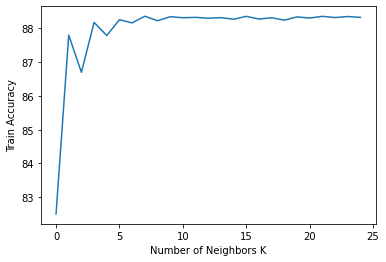

In [70]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, Y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
knnpred = knn.predict(X_test)

In [72]:
print('Precision score')
print(round(precision_score(Y_test,knnpred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,knnpred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,knnpred),2)*100)
print('Accuracy score')
KNN_A=round(accuracy_score(Y_test,knnpred),2)*100
print(KNN_A)

Precision score
56.00000000000001
Recall score
18.0
F1 score
27.0
Accuracy score
89.0


# Support Vector Machine

In [73]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, Y_train)
svcpred = svc.predict(X_test)

In [74]:
print('Precision score')
print(round(precision_score(Y_test,svcpred),2)*100)
print('Recall score')
print(round(recall_score(Y_test,svcpred),2)*100)
print('F1 score')
print(round(f1_score(Y_test,svcpred),2)*100)
print('Accuracy score')
SVC_A=round(accuracy_score(Y_test,svcpred),2)*100
print(SVC_A)

Precision score
16.0
Recall score
16.0
F1 score
16.0
Accuracy score
81.0


In [75]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFC_A, DT_A, SVC_A, KNN_A, LR_A, GNB_A, XGB_A, GBC_A]})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,XGBoost,90.0
0,Random Forest Classifier,89.0
3,K-Near Neighbors,89.0
4,Logistic Model,89.0
7,Gradient Boosting,89.0
1,Decision Tree Classifier,82.0
2,Support Vector Machine,81.0
5,Gausian NB,80.0


**Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**

**A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:**

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

In [76]:
from sklearn import metrics

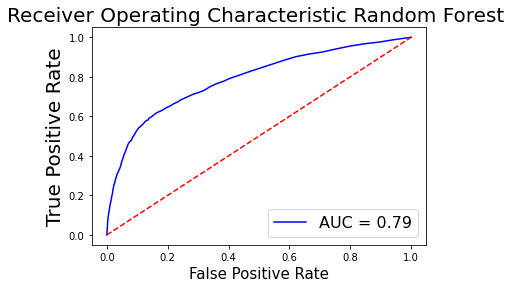

In [77]:
#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Random Forest ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


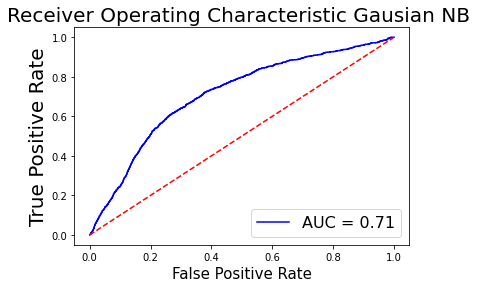

In [78]:
#Gausian NB--------------------
probs = gnnb.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Gausian NB ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


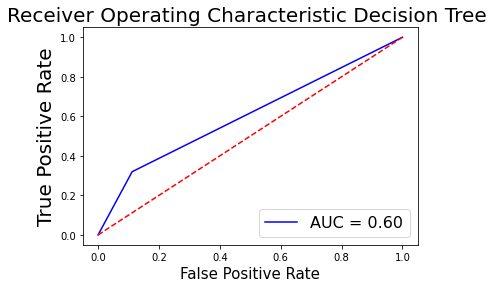

In [79]:
#Decision Tree Classifier--------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


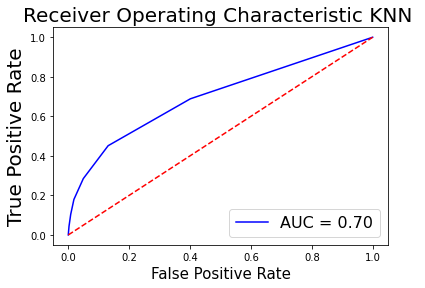

In [80]:
#K-Near Neighbors --------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic KNN ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


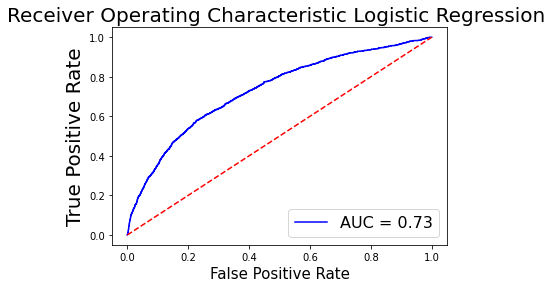

In [81]:
#Logistic Model --------------------
probs = Log_reg.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


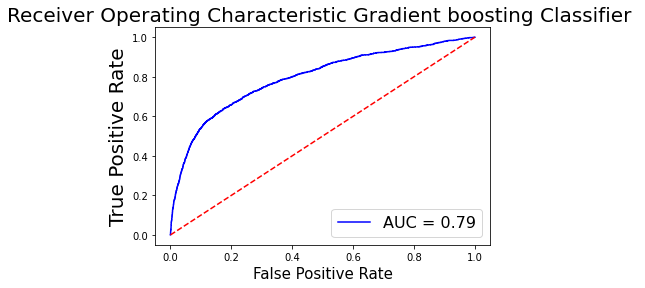

In [82]:
#Gradient Boosting classifier --------------------
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Gradient boosting Classifier ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


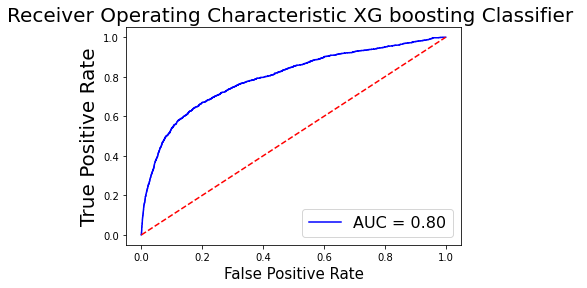

In [84]:
#XGB classifier --------------------
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic XG boosting Classifier ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


# Deliverable - 5 Final Conclusion
- From the above XG-Boost classifier is performing better with Accuracy Score of 90 and Auc score of 80
- Later Random forest and Gradient boosting Classifier are doing better with Accuracy score of 89 and AUC score of 79